Report on mass shooting
BY: Vansh Matreja
Division: A
 

In [1]:
# Setup of jyupter notebook
import pandas as pd

In [2]:
# import our dataset into jyupter notebook
shooting_df = pd.read_csv("Mass-Shooting-Data-2016.csv")
shooting_df

,date,city,state,injured,killed,lat,lng
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728
...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628


In [3]:
# Create a column caleed persons involved
shooting_df["Person_involved"] = shooting_df["injured"] + shooting_df["killed"]
shooting_df

,date,city,state,injured,killed,lat,lng,Person_involved
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421,4
1,2-Nov-16,Little Rock,Arkansas,4,0,34.746481,-92.289595,4
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628,6
3,31-Oct-16,Shreveport,Louisiana,4,0,32.522183,-93.765194,4
4,30-Oct-16,Toledo,Ohio,4,0,41.678675,-83.512728,4
...,...,...,...,...,...,...,...,...
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589,5
321,8-Jan-16,Washington,District of Columbia,4,0,38.894955,-77.036646,4
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421,5
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628,4


In [4]:
# What was the maximum person involved in mass shooting

max_persons_involved = shooting_df.Person_involved.max()
print("The maximum persons involved in mass shooting incident in 2016 was", max_persons_involved, "people")

The maximum persons involved in mass shooting incident in 2016 was 103 people


In [5]:
# What was the total person involved in all mass shooting

total_persons_involved = shooting_df.Person_involved.sum()
print("The total persons involved in mass shooting incident in 2016 was", total_persons_involved, "people")

The total persons involved in mass shooting incident in 2016 was 1711 people


In [6]:
# What was the average peoplr injured in all mass shooting in 2016

avg_injured_per_incident = shooting_df.Person_involved.mean()
print("The total persons injured on average in mass shooting incident in 2016 was", avg_injured_per_incident, "people")

The total persons injured on average in mass shooting incident in 2016 was 5.264615384615385 people


In [7]:
# What was the top 5 mass shooting incident by persons involved
top_5_incidents_df = shooting_df.sort_values("Person_involved", ascending = False).head(5)
top_5_incidents_df 

,date,city,state,injured,killed,lat,lng,Person_involved
187,12-Jun-16,Orlando,Florida,53,50,28.542117,-81.379046,103
117,25-Jul-16,Fort Myers,Florida,19,2,26.640628,-81.872308,21
290,25-Feb-16,Hesston,Kansas,14,4,38.138344,-97.431427,18
133,16-Jul-16,Bakersfield,California,14,1,35.373871,-119.019464,15
22,15-Oct-16,Los Angeles,California,11,4,34.054394,-118.243941,15


In [8]:
# Challenge create a data that shows only incidents where tere were more than 10 people involved
more_than_10_people = shooting_df.loc[shooting_df["Person_involved"]>=10]
more_than_10_people

,date,city,state,injured,killed,lat,lng,Person_involved
22,15-Oct-16,Los Angeles,California,11,4,34.054394,-118.243941,15
63,4-Sep-16,Roanoke,Virginia,10,1,37.270973,-79.941431,11
77,21-Aug-16,Bridgeport,Connecticut,13,0,41.167041,-73.204835,13
117,25-Jul-16,Fort Myers,Florida,19,2,26.640628,-81.872308,21
133,16-Jul-16,Bakersfield,California,14,1,35.373871,-119.019464,15
146,7-Jul-16,Dallas,Texas,9,5,32.762040,-96.779007,14
187,12-Jun-16,Orlando,Florida,53,50,28.542117,-81.379046,103
290,25-Feb-16,Hesston,Kansas,14,4,38.138344,-97.431427,18
306,7-Feb-16,Orlando,Florida,10,2,28.542117,-81.379046,12


In [9]:
#total number of columns

more_than_10_people_count = shooting_df.loc[shooting_df["Person_involved"]>=10]
total_incident_with_atleast_10 = more_than_10_people_count.date.count()
print("There were",total_incident_with_atleast_10, "mass shooting incident in which there were atleast 10 people involved" )

There were 9 mass shooting incident in which there were atleast 10 people involved


In [10]:
# The total killed injured and involved by state city

city_df = shooting_df.groupby(["state","city"]).agg(total_injured = ("injured","sum"),
                                                 total_killed = ("killed","sum"),
                                                total_person_involved = ("Person_involved","sum"),
                                                total_incidents = ("city","count"))
city_df.sort_values("total_incidents", ascending = False)

,,total_injured,total_killed,total_person_involved,total_incidents
state,city,,,,
Illinois,Chicago,87,11,98,22
Texas,Houston,31,10,41,8
California,Los Angeles,36,8,44,8
Illinois,Chicago (Englewood),23,3,26,6
Florida,Miami,22,7,29,6
...,...,...,...,...,...
Maryland,District Heights (Forestville),4,1,5,1
Alabama,Auburn,1,3,4,1
Massachusetts,Chelsea,6,1,7,1


LEC 13

In [11]:
national_median_persons_involved = city_df.total_person_involved.median()
national_median_persons_involved

5.0

In [12]:
ab_df = city_df.loc[(city_df["total_person_involved"]>10) & (city_df["total_incidents"]>3)]
ab_df

total_injured  total_killed  \
state                city                                               
California           Los Angeles                     36             8   
                     Oakland                         27             1   
Colorado             Denver                          12             4   
District of Columbia Washington                      23             2   
Florida              Miami                           22             7   
                     Orlando                         77            55   
Georgia              Atlanta                         18             1   
Illinois             Chicago                         87            11   
                     Chicago (Englewood)             23             3   
Maryland             Baltimore                       26             0   
Michigan             Detroit                         19             4   
Minnesota            Minneapolis                     20             1   
New York             Brooklyn                        24             0   
Pennsylvania         Philadelphia                    14             5   
Tennessee            Memphis                         16             2   
Texas                Houston                         31            10   

                                          total_person_involved  \
state                city                                         
California           Los Angeles                             44   
                     Oakland                                 28   
Colorado             Denver                                  16   
District of Columbia Washington                              25   
Florida              Miami                                   29   
                     Orlando                                132   
Georgia              Atlanta                                 19   
Illinois             Chicago                                 98   
                     Chicago (Englewood)                     26   
Maryland             Baltimore                               26   
Michigan             Detroit                                 23   
Minnesota            Minneapolis                             21   
New York             Brooklyn                                24   
Pennsylvania         Philadelphia                            19   
Tennessee            Memphis                                 18   
Texas                Houston                                 41   

                                          total_incidents  
state                city                                  
California           Los Angeles                        8  
                     Oakland                            6  
Colorado             Denver                             4  
District of Columbia Washington                         5  
Florida              Miami                              6  
                     Orlando                            5  
Georgia              Atlanta                            4  
Illinois             Chicago                           22  
                     Chicago (Englewood)                6  
Maryland             Baltimore                          5  
Michigan             Detroit                            5  
Minnesota            Minneapolis                        4  
New York             Brooklyn                           5  
Pennsylvania         Philadelphia                       4  
Tennessee            Memphis                            4  
Texas                Houston                            8

In [13]:
city_df["person_involved_per_incident"] = city_df["total_person_involved"]/city_df["total_incidents"]
city_df

total_injured  total_killed  \
state         city                                               
Alabama       Anniston                         4             0   
              Auburn                           1             3   
              Bessemer                         3             1   
              Bessemer (Brighton)              6             1   
              Birmingham                       4             1   
...                                          ...           ...   
Washington    Seattle                          3             2   
              Tacoma                           5             0   
              Woodland                         1             3   
West Virginia Charleston                       3             1   
Wisconsin     Milwaukee                        5             3   

                                   total_person_involved  total_incidents  \
state         city                                                          
Alabama       Anniston                                 4                1   
              Auburn                                   4                1   
              Bessemer                                 4                1   
              Bessemer (Brighton)                      7                1   
              Birmingham                               5                1   
...                                                  ...              ...   
Washington    Seattle                                  5                1   
              Tacoma                                   5                1   
              Woodland                                 4                1   
West Virginia Charleston                               4                1   
Wisconsin     Milwaukee                                8                2   

                                   person_involved_per_incident  
state         city                                               
Alabama       Anniston                                      4.0  
              Auburn                                        4.0  
              Bessemer                                      4.0  
              Bessemer (Brighton)                           7.0  
              Birmingham                                    5.0  
...                                                         ...  
Washington    Seattle                                       5.0  
              Tacoma                                        5.0  
              Woodland                                      4.0  
West Virginia Charleston                                    4.0  
Wisconsin     Milwaukee                                     4.0  

[194 rows x 5 columns]

In [14]:
z_index_df = city_df.loc[city_df["person_involved_per_incident"]>10]
z_index_df

total_injured  total_killed  total_person_involved  \
state       city                                                              
California  Bakersfield             14             1                     15   
Connecticut Bridgeport              13             0                     13   
Florida     Fort Myers              23             2                     25   
            Orlando                 77            55                    132   
Kansas      Hesston                 14             4                     18   

                         total_incidents  person_involved_per_incident  
state       city                                                        
California  Bakersfield                1                          15.0  
Connecticut Bridgeport                 1                          13.0  
Florida     Fort Myers                 2                          12.5  
            Orlando                    5                          26.4  
Kansas      Hesston                    1                          18.0

In [15]:
dangerous_incidents_df = shooting_df.loc[(shooting_df["injured"]>=5) | (shooting_df["killed"]>=1)]
dangerous_incidents_df

,date,city,state,injured,killed,lat,lng,Person_involved
0,3-Nov-16,Chicago,Illinois,2,2,41.875555,-87.624421,4
2,1-Nov-16,Memphis,Tennessee,5,1,35.149022,-90.051628,6
5,30-Oct-16,Newburgh,New York,5,2,41.503427,-74.010418,7
7,30-Oct-16,Capitol Heights,Maryland,4,2,38.885396,-76.915944,6
8,30-Oct-16,San Antonio,Texas,5,0,29.424600,-98.495140,5
...,...,...,...,...,...,...,...,...
319,17-Jan-16,Ware Neck (Gloucester Courthouse),Virginia,3,1,37.402640,-76.458560,4
320,11-Jan-16,Wilmington,Delaware,4,1,39.745947,-75.546589,5
322,8-Jan-16,Chicago,Illinois,4,1,41.875555,-87.624421,5
323,7-Jan-16,Memphis,Tennessee,3,1,35.149022,-90.051628,4


In [16]:
dangerous_city_df = dangerous_incidents_df.groupby(["state","city"]).agg(dangerous_incidents = ("city","count"))
dangerous_city_df.sort_values("dangerous_incidents", ascending = False)

dangerous_incidents
state         city                                       
Illinois      Chicago                                  11
Texas         Houston                                   8
Florida       Miami                                     6
California    Los Angeles                               5
Michigan      Detroit                                   4
...                                                   ...
Georgia       Moultrie                                  1
              Mcdonough (Mc Donough)                    1
              Jackson                                   1
              Dekalb (county)                           1
Massachusetts Boston                                    1

[153 rows x 1 columns]

Challenge make a metric that specifically highlights only cities which have 5 incidents and 10 ppl killed

In [17]:
challenge_df = city_df.loc[(city_df["total_incidents"]>=5) | (city_df["total_killed"]>=10)].reset_index()
challenge_df

,state,city,total_injured,total_killed,total_person_involved,total_incidents,person_involved_per_incident
0,California,Los Angeles,36,8,44,8,5.500000
1,California,Oakland,27,1,28,6,4.666667
2,District of Columbia,Washington,23,2,25,5,5.000000
3,Florida,Miami,22,7,29,6,4.833333
4,Florida,Orlando,77,55,132,5,26.400000
5,Illinois,Chicago,87,11,98,22,4.454545
6,Illinois,Chicago (Englewood),23,3,26,6,4.333333
7,Maryland,Baltimore,26,0,26,5,5.200000
8,Michigan,Detroit,19,4,23,5,4.600000
9,New York,Brooklyn,24,0,24,5,4.800000


DATA VISUALISATION

In [18]:
# data viz setup
import seaborn as sns
import matplotlib.pyplot as plt  

Make a bar chart that shows top 10 cities with more people killed

In [19]:
bar_chart_df_all_cities = shooting_df.groupby(["state","city"]).agg(total_killed = ("killed","sum"))
bar_chart_df_top_10_cities = bar_chart_df_all_cities.sort_values("total_killed", ascending = False).head(10).reset_index()
bar_chart_df_top_10_cities

,state,city,total_killed
0,Florida,Orlando,55
1,Illinois,Chicago,11
2,Texas,Houston,10
3,California,Los Angeles,8
4,Arizona,Glendale,8
5,Ohio,Piketon,8
6,Florida,Miami,7
7,Georgia,Appling,6
8,Texas,Austin,6
9,Texas,Dallas,6


<AxesSubplot:xlabel='city', ylabel='total_killed'>

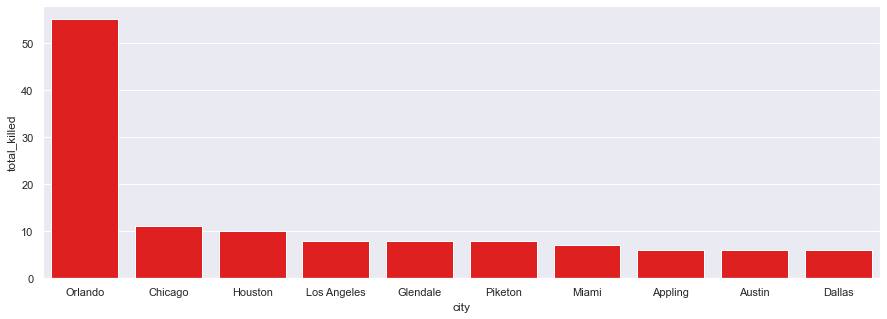

In [20]:
# printing bar chart
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = "city", y = "total_killed", data = bar_chart_df_top_10_cities,color = "red")

In [21]:
incidents_all_cities_df = shooting_df.groupby(["state","city"]).agg(total_incidents = ("city","count"))
incidents_top_5_cities_df = incidents_all_cities_df.sort_values("total_incidents", ascending = False).head(5).reset_index()
incidents_top_5_cities_df

,state,city,total_incidents
0,Illinois,Chicago,22
1,Texas,Houston,8
2,California,Los Angeles,8
3,Illinois,Chicago (Englewood),6
4,Florida,Miami,6


<AxesSubplot:xlabel='city', ylabel='total_incidents'>

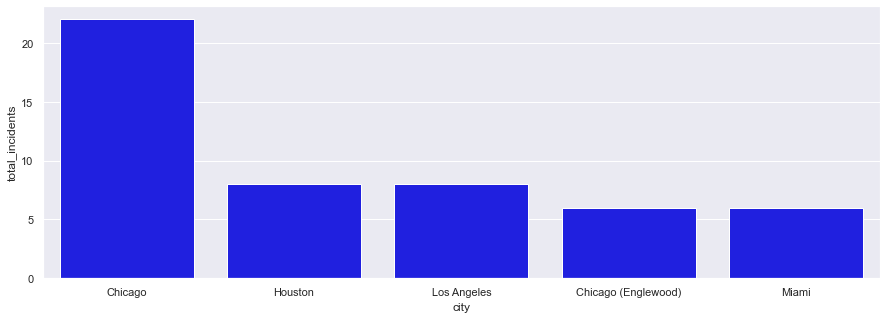

In [22]:
sns.barplot(x = "city", y = "total_incidents", data = incidents_top_5_cities_df,color = "blue")